In [1]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
import glob
from decimal import Decimal
from matplotlib.ticker import MaxNLocator
import pandas as pd

# Load results

In [2]:
mlz_251E1 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z102_52.txt", delimiter=",")
mlz_251E2 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1002_52.txt", delimiter=",")
mlz_251E3 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10002_52.txt", delimiter=",")
mlz_251E4 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100002_52.txt", delimiter=",")
mlz_251E5 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1000002_52.txt", delimiter=",")
mlz_251E6 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10000002_52.txt", delimiter=",")
mlz_251E7 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100000002_52.txt", delimiter=",")

In [3]:
mlz_351E1 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z103_52.txt", delimiter=",")
mlz_351E2 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1003_52.txt", delimiter=",")
mlz_351E3 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10003_52.txt", delimiter=",")
mlz_351E4 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100003_52.txt", delimiter=",")
mlz_351E5 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1000003_52.txt", delimiter=",")
mlz_351E6 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10000003_52.txt", delimiter=",")
mlz_351E7 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100000003_52.txt", delimiter=",")

In [4]:
mlz_451E1 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z104_52.txt", delimiter=",")
mlz_451E2 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1004_52.txt", delimiter=",")
mlz_451E3 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10004_52.txt", delimiter=",")
mlz_451E4 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100004_52.txt", delimiter=",")
mlz_451E5 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1000004_52.txt", delimiter=",")
mlz_451E6 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10000004_52.txt", delimiter=",")
mlz_451E7 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100000004_52.txt", delimiter=",")

In [5]:
mlz_551E1 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z105_52.txt", delimiter=",")
mlz_551E2 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1005_52.txt", delimiter=",")
mlz_551E3 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10005_52.txt", delimiter=",")
mlz_551E4 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100005_52.txt", delimiter=",")
mlz_551E5 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z1000005_52.txt", delimiter=",")
mlz_551E6 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z10000005_52.txt", delimiter=",")
mlz_551E7 = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/mean_l_Z100000005_52.txt", delimiter=",")

# Set data

In [6]:
# Biggest component size (effective total number of nodes)
mlz25 = np.array([mlz_251E1, mlz_251E2, mlz_251E3, mlz_251E4, mlz_251E5, mlz_251E6, mlz_251E7])
mlz35 = np.array([mlz_351E1, mlz_351E2, mlz_351E3, mlz_351E4, mlz_351E5, mlz_351E6, mlz_351E7])
mlz45 = np.array([mlz_451E1, mlz_451E2, mlz_451E3, mlz_451E4, mlz_451E5, mlz_451E6, mlz_451E7])
mlz55 = np.array([mlz_551E1, mlz_551E2, mlz_551E3, mlz_551E4, mlz_551E5, mlz_551E6, mlz_551E7])

In [7]:
ln_N = np.log(np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]))
N = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) 

In [8]:
ml25 = np.mean(mlz25, axis=1)

In [9]:
ml25

array([2.39679 , 4.930384, 5.998138, 6.503247, 6.979636, 7.399472,
       7.608753])

In [10]:
def func(x, a, b):
    return a * x + b

In [11]:
def func1(x, a, b, c):
    return a * np.exp(b * x + c)

In [12]:
popt, pcov = curve_fit(func, ln_N, ml25)

In [13]:
popt1, pcov1 = curve_fit(func1, ln_N, ml25)

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [14]:
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr1.fit(ln_N[1:].reshape(-1,1), np.log(ml25[1:]))
regr2.fit(ln_N.reshape(-1,1), ml25)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
x_p = np.linspace(ln_N[1:].min(), ln_N.max(), 100).reshape(-1,1)
y_p1 = np.exp(regr1.predict(x_p))
y_p2 = regr2.predict(x_p)
y_test1 = np.exp(regr1.predict(ln_N.reshape(-1,1)))
y_test2 = regr2.predict(ln_N.reshape(-1,1))
mse1 = mean_squared_error(y_test1, ml25)
mse2 = mean_squared_error(y_test2, ml25)

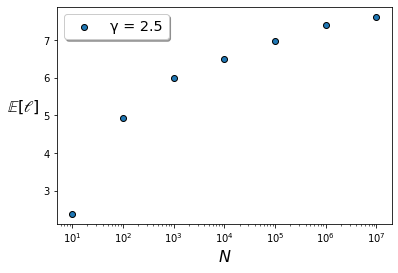

In [16]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots()
# if(mse51 < mse52):
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
ax.scatter(N, ml25, color='black', facecolors='C0', label='γ = 2.5')

# if(mse41 < mse42):
#     ax.plot(x_p, y_p41, color='black', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, y_p42, color='black', ls='--', alpha=0.3)
# ax.scatter(ln_ln_N, mean_l2, color='black', facecolors='none', label='γ = 4')


ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('$\mathbb{E}[\mathscr{l}]$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$N$', font)
# plt.yscale('log')
plt.xscale('log')
# plt.text(2.4, 2.70, r'mse exp = %.2f'% mse51, font1, alpha=0.6)
# plt.text(2.4, 2.30, r'mse line= %.2f'%mse52, font1, alpha=0.6)

# plt.text(2.4, 1.70, r'mse exp = %.2f'% mse41, font, alpha=0.6)
# plt.text(2.4, 1.30, r'mse line= %.2f'%mse42, font, alpha=0.6)
# plt.title('γ = 3', fontdict=font)
plt.savefig("usw25.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [17]:
ml35 = np.mean(mlz35, axis=1)

In [18]:
ml35

array([ 2.594814, 11.241503, 17.66765 , 23.49457 , 28.69323 , 33.75235 ,
       38.32329 ])

In [19]:
popt, pcov = curve_fit(func, ln_N, ml35)

In [20]:
popt1, pcov1 = curve_fit(func1, ln_N, ml35)

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [21]:
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr1.fit(ln_N[1:].reshape(-1,1), np.log(ml35[1:]))
regr2.fit(ln_N[1:].reshape(-1,1), ml35[1:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
x_p = np.linspace(ln_N[1:].min(), ln_N.max(), 100).reshape(-1,1)
y_p1 = np.exp(regr1.predict(x_p))
y_p2 = regr2.predict(x_p)
y_test1 = np.exp(regr1.predict(ln_N.reshape(-1,1)))
y_test2 = regr2.predict(ln_N.reshape(-1,1))
mse1 = mean_squared_error(y_test1, ml35)
mse2 = mean_squared_error(y_test2, ml35)

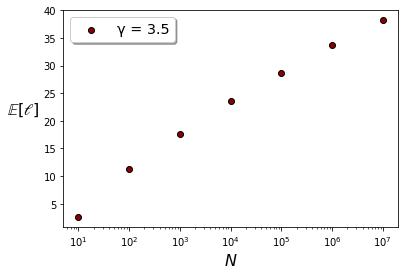

In [23]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots()
# if(mse51 < mse52):
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
ax.scatter(N, ml35, color='black', facecolors='Darkred', label='γ = 3.5')

# if(mse41 < mse42):
#     ax.plot(x_p, y_p41, color='black', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, y_p42, color='black', ls='--', alpha=0.3)
# ax.scatter(ln_ln_N, mean_l2, color='black', facecolors='none', label='γ = 4')


ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('$\mathbb{E}[\mathscr{l}]$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$N$', font)
# plt.yscale('log')
plt.xscale('log')
# plt.text(2.4, 2.70, r'mse exp = %.2f'% mse51, font1, alpha=0.6)
# plt.text(2.4, 2.30, r'mse line= %.2f'%mse52, font1, alpha=0.6)

# plt.text(2.4, 1.70, r'mse exp = %.2f'% mse41, font, alpha=0.6)
# plt.text(2.4, 1.30, r'mse line= %.2f'%mse42, font, alpha=0.6)
# plt.title('γ = 3', fontdict=font)
plt.savefig("usw35.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [24]:
ml45 = np.mean(mlz45, axis=1)

In [25]:
ml45

array([  2.330001,  16.42548 ,  39.69326 ,  57.83205 ,  76.41666 ,
        95.15877 , 113.4271  ])

In [26]:
popt, pcov = curve_fit(func, ln_N, ml45)

In [27]:
popt1, pcov1 = curve_fit(func1, ln_N, ml45)

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [28]:
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr1.fit(ln_N[1:].reshape(-1,1), np.log(ml45[1:]))
regr2.fit(ln_N[1:].reshape(-1,1), ml45[1:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
x_p = np.linspace(ln_N[1:].min(), ln_N.max(), 100).reshape(-1,1)
y_p1 = np.exp(regr1.predict(x_p))
y_p2 = regr2.predict(x_p)
y_test1 = np.exp(regr1.predict(ln_N.reshape(-1,1)))
y_test2 = regr2.predict(ln_N.reshape(-1,1))
mse1 = mean_squared_error(y_test1, ml45)
mse2 = mean_squared_error(y_test2, ml45)

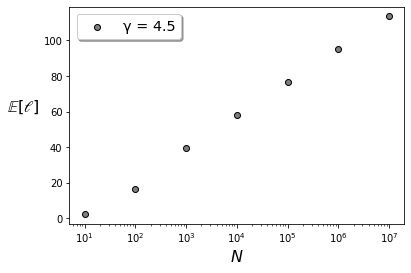

In [30]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots()
# if(mse51 < mse52):
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
ax.scatter(N, ml45, color='black', facecolors='tab:gray', label='γ = 4.5')

# if(mse41 < mse42):
#     ax.plot(x_p, y_p41, color='black', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, y_p42, color='black', ls='--', alpha=0.3)
# ax.scatter(ln_ln_N, mean_l2, color='black', facecolors='none', label='γ = 4')


ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('$\mathbb{E}[\mathscr{l}]$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$N$', font)
# plt.yscale('log')
plt.xscale('log')
# plt.text(2.4, 2.70, r'mse exp = %.2f'% mse51, font1, alpha=0.6)
# plt.text(2.4, 2.30, r'mse line= %.2f'%mse52, font1, alpha=0.6)

# plt.text(2.4, 1.70, r'mse exp = %.2f'% mse41, font, alpha=0.6)
# plt.text(2.4, 1.30, r'mse line= %.2f'%mse42, font, alpha=0.6)
# plt.title('γ = 3', fontdict=font)
plt.savefig("usw45.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [31]:
ml55 = np.mean(mlz55, axis=1)

In [32]:
ml55

array([  2.356668,  18.88854 ,  80.50312 , 120.3797  , 168.0702  ,
       216.7129  , 265.7896  ])

In [33]:
popt, pcov = curve_fit(func, ln_N, ml55)

In [34]:
popt1, pcov1 = curve_fit(func1, ln_N, ml55)

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [35]:
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr1.fit(ln_N[1:].reshape(-1,1), np.log(ml55[1:]))
regr2.fit(ln_N.reshape(-1,1), ml55)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
x_p = np.linspace(ln_N[1:].min(), ln_N.max(), 100).reshape(-1,1)
y_p1 = np.exp(regr1.predict(x_p))
y_p2 = regr2.predict(x_p)
y_test1 = np.exp(regr1.predict(ln_N.reshape(-1,1)))
y_test2 = regr2.predict(ln_N.reshape(-1,1))
mse1 = mean_squared_error(y_test1, ml55)
mse2 = mean_squared_error(y_test2, ml55)

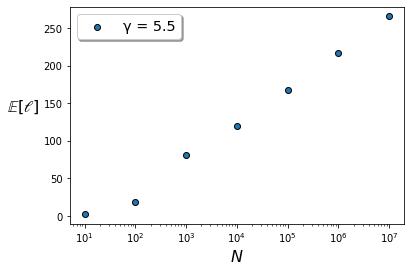

In [37]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots()
# if(mse51 < mse52):
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, func(x_p, *popt), color='blue', ls='--', alpha=0.3)
ax.scatter(N, ml55, color='black', facecolors='C0', label='γ = 5.5')

# if(mse41 < mse42):
#     ax.plot(x_p, y_p41, color='black', ls='--', alpha=0.3)
# else:
#     ax.plot(x_p, y_p42, color='black', ls='--', alpha=0.3)
# ax.scatter(ln_ln_N, mean_l2, color='black', facecolors='none', label='γ = 4')


ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('$\mathbb{E}[\mathscr{l}]$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$N$', font)
# plt.yscale('log')
plt.xscale('log')
# plt.text(2.4, 2.70, r'mse exp = %.2f'% mse51, font1, alpha=0.6)
# plt.text(2.4, 2.30, r'mse line= %.2f'%mse52, font1, alpha=0.6)

# plt.text(2.4, 1.70, r'mse exp = %.2f'% mse41, font, alpha=0.6)
# plt.text(2.4, 1.30, r'mse line= %.2f'%mse42, font, alpha=0.6)
# plt.title('γ = 3', fontdict=font)
plt.savefig("usw55.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [39]:
for i in range(1, 8):
    mean = 0
    α = 0
    γ = 2.5
    for j in range (1, (10**i) - 1):
        α += (1 / j)**(γ)
    for j in range (1, (10**i) - 1):
        mean += (1 / j)**(γ - 1)
    mean /= α
    print(mean)

1.4655508708873115
1.798067833907767
1.900221151241068
1.9324634826829346
1.9426578767708087
1.9458815835706962
1.9469010080230515
